<a href="https://colab.research.google.com/github/dk-tran92/ML/blob/main/Nhan_dang_mau_Fri1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bayesian Linear Regression with Pyro
##Install Pyro

In [72]:
!pip install pyro-ppl

##Related Libraries

In [73]:
import time         # We will time our execution often

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load Database

In [74]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

print(f'Data shape is {X.shape}')
print(f'Target shape is {y.shape}')

Data shape is (442, 10)
Target shape is (442,)


##Data Description
"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n=442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

- 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements
- Response: a quantitative measure of disease progression after 1 year

In [75]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [76]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [77]:
diabetes.target[0]

151.0

In [78]:
features_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


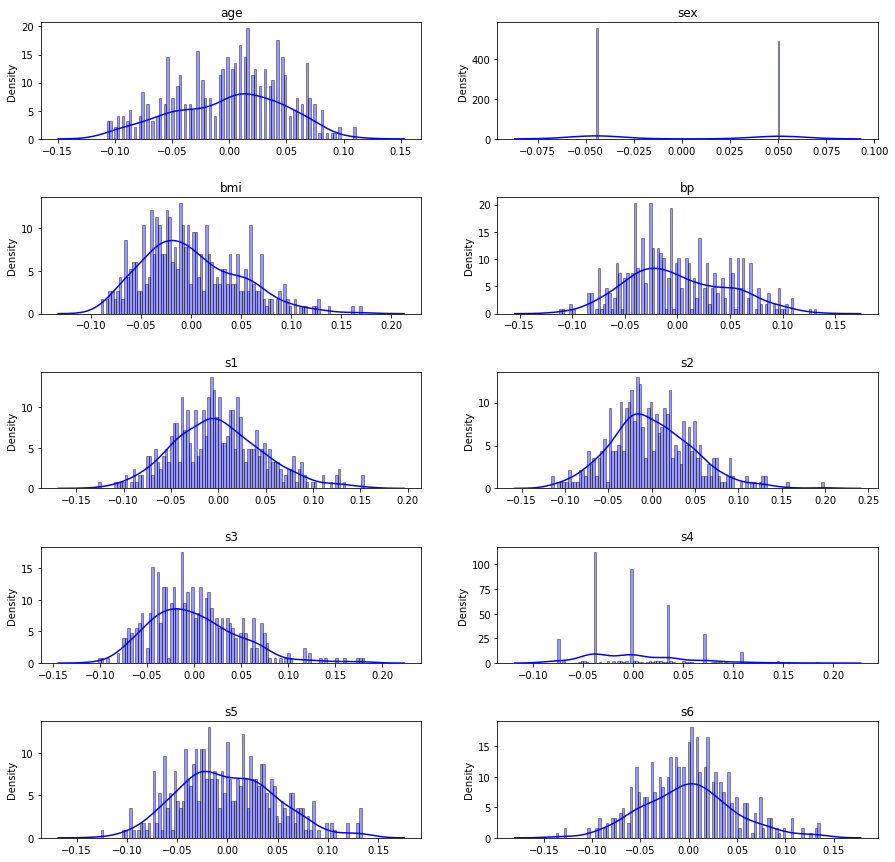

In [79]:
def draw_features(features_df):
    figure, axis = plt.subplots(5,2, figsize=(15,15))


    for key, ax in zip(features_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(features_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_features(features_df)

In [80]:
diabetes.data[:,1]*10+0.5

array([1.00680119, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       0.05358363, 1.00680119, 1.00680119, 1.00680119, 0.05358363,
       0.05358363, 1.00680119, 0.05358363, 1.00680119, 0.05358363,
       1.00680119, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       0.05358363, 1.00680119, 0.05358363, 1.00680119, 0.05358363,
       1.00680119, 0.05358363, 0.05358363, 0.05358363, 1.00680119,
       0.05358363, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       1.00680119, 0.05358363, 0.05358363, 1.00680119, 1.00680119,
       1.00680119, 0.05358363, 1.00680119, 0.05358363, 1.00680119,
       1.00680119, 0.05358363, 0.05358363, 1.00680119, 1.00680119,
       0.05358363, 1.00680119, 0.05358363, 0.05358363, 0.05358363,
       0.05358363, 0.05358363, 0.05358363, 0.05358363, 1.00680119,
       0.05358363, 1.00680119, 1.00680119, 0.05358363, 1.00680119,
       1.00680119, 1.00680119, 1.00680119, 1.00680119, 0.05358363,
       0.05358363, 0.05358363, 1.00680119, 1.00680119, 1.00680

Text(0.5, 1.0, 'Distribution of sex')

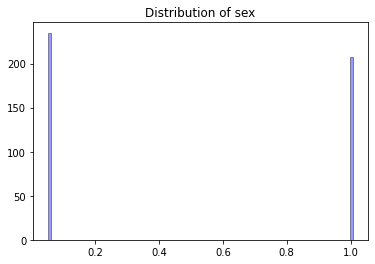

In [81]:
sns.distplot(diabetes.data[:,1]*10+0.5,
              bins=100, 
              color="blue", 
              kde=False, 
              axlabel=False, 
              hist_kws=dict(edgecolor="black"))
plt.title("Distribution of sex")


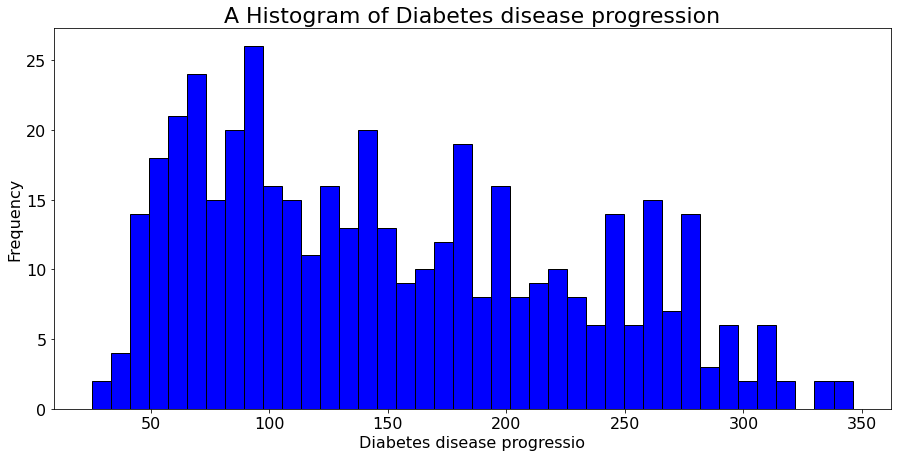

In [82]:
plt.figure(figsize=(15,7))
plt.hist(y, bins=40, color="blue", edgecolor="black")
plt.xlabel("Diabetes disease progressio", size=16)
plt.ylabel("Frequency", size=16)
plt.title("A Histogram of Diabetes disease progression", size=22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

Ta thấy dạng phân phối của y không phải là phân phối chuẩn mà có vẻ như là một phân phối Gamma (dương và bị lệch)

##Train test split


In [83]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


##Tradiational Linear Regression

In [84]:
# start timing
start_time = time.time()

# fit linear regression
my_linear_regression = LinearRegression().fit(X_train,y_train)
y_pred = my_linear_regression.predict(X_test)

end_time = time.time()

# print point estimates of the coefficients
print(f"beta_intercept: {round(my_linear_regression.intercept_, 2)}")
for i, col in enumerate(diabetes.feature_names):
    print(f"beta_{col}: {round(my_linear_regression.coef_[i], 2)}")

beta_intercept: 150.08
beta_age: -2.64
beta_sex: -202.68
beta_bmi: 499.13
beta_bp: 360.44
beta_s1: -824.21
beta_s2: 435.01
beta_s3: 181.02
beta_s4: 249.31
beta_s5: 718.72
beta_s6: 64.48


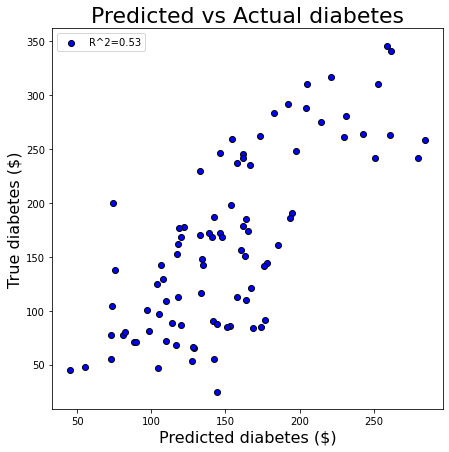

In [85]:
def plot_all_observations(y_true, y_pred, y_max):
    
    y_pred_censored = np.where(y_pred > y_max, y_max, y_pred)
    
    plt.figure(figsize=(7, 7))
    plt.scatter(y_pred_censored, y_test, 
                c="blue", edgecolor="black", 
                label=f'R^2={round(r2_score(y_test, y_pred_censored),2)}')
    
    plt.title("Predicted vs Actual diabetes", size=22)
    plt.xlabel("Predicted diabetes ($)", size=16)
    plt.ylabel("True diabetes ($)", size=16)
    plt.ticklabel_format(style='plain')
    plt.legend()
    
    plt.show()
    
    
    
# Now let's call our function
y_censor_label = y_train.max()
plot_all_observations(y_test, y_pred, y_censor_label)

# Bayesion Linear Regression with Pyro


In [86]:
# import all required Pyro/Pytorch libraries
import torch
torch.set_default_tensor_type(torch.FloatTensor) # set the default to float32

import pyro
import pyro.distributions as dist

# We will use Markov Chain Monte Carlo (MCMC) methods here, specifically the No U-Turn Sampler (NUTS)
from pyro.infer import MCMC, NUTS

$y_i\sim\mathcal{N}(\mu_i, \sigma^2)$

Trong đó:  
$\mu_i = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$  
$\beta_i\sim\mathcal{N}(0, 1^2)$

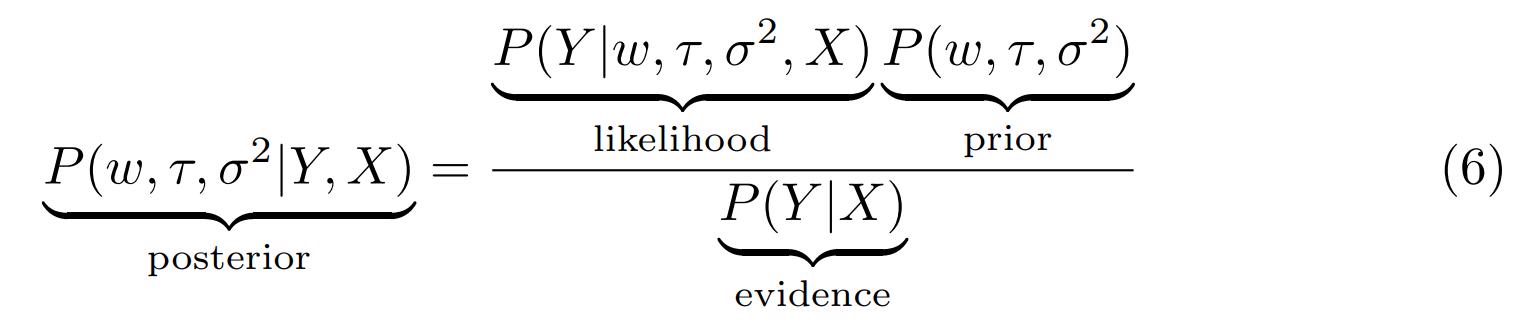

In [87]:
def model_normal(X, y, column_names):
    
    # Define our intercept prior
    intercept_prior = dist.Normal(0.0, 1.0)
    linear_combination = pyro.sample(f"beta_intercept", intercept_prior)
    
    
    # Also define coefficient priors
    for i in range(X.shape[1]):
        coefficient_prior = dist.Normal(0.0, 1.0)
        beta_coef = pyro.sample(f"beta_{column_names[i]}", coefficient_prior)
        linear_combination = linear_combination + (X[:, i] * beta_coef)
    
    
    # Define a sigma prior for the random error
    sigma = pyro.sample("sigma", dist.HalfNormal(scale=10.0))
    
    # For a simple linear model, the expected mean is the linear combination of parameters
    mean = linear_combination
    
    
    with pyro.plate("data", y.shape[0]):
        
        # Assume our expected mean comes from a normal distribution with the mean which
        # depends on the linear combination, and a standard deviatin "sigma"
        outcome_dist = dist.Normal(mean, sigma)
        
        # Condition the expected mean on the observed target y
        observation = pyro.sample("obs", outcome_dist, obs=y)

In [88]:
SAMPLE_NUMBER = 353


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 353 samples. 
# Then discard the first 53
my_mcmc1 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=53)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc1.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 406/406 [05:15,  1.29it/s, step size=4.01e-02, acc. prob=0.936]


Inference ran for 5.26 minutes


In [89]:
my_mcmc1.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age     -0.09      1.06     -0.14     -1.62      1.67    419.20      1.00
        beta_bmi      0.00      0.99      0.02     -1.38      1.78    350.69      1.00
         beta_bp      0.07      0.95      0.14     -1.47      1.53    425.40      1.00
  beta_intercept      2.87      0.96      2.86      1.50      4.54    509.94      1.00
         beta_s1      0.05      1.01      0.07     -1.46      1.77    610.86      1.00
         beta_s2     -0.01      1.12     -0.05     -1.81      1.79    478.13      1.00
         beta_s3     -0.01      1.03      0.01     -1.88      1.48    493.58      1.00
         beta_s4      0.06      1.06      0.11     -1.74      1.72    674.21      1.01
         beta_s5      0.05      0.90      0.01     -1.34      1.39    382.93      1.00
         beta_s6      0.06      1.01      0.08     -1.44      1.72    510.96      1.01
        beta_sex     -0.07      1.04     -

In [90]:
beta_df = pd.DataFrame(my_mcmc1.get_samples())
beta_df.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,0.512892,-0.423081,0.670238,2.715574,-0.328347,-0.481096,0.616816,-0.021549,0.911597,0.664600,0.389803,137.530026
1,-0.683877,-1.260112,1.851463,2.122043,0.319781,-0.053947,-0.606437,2.715225,0.401644,1.135376,-1.021369,138.740026
2,0.942562,0.443294,0.374798,3.425644,-0.796008,-0.612492,0.460218,-2.606473,-0.502634,-0.700821,1.230567,138.451928
3,-1.081439,-0.205294,-0.303763,2.429469,-0.467436,1.357210,-1.176831,2.224778,0.583553,0.759342,-0.669879,136.910794
4,0.760930,0.068885,0.114803,3.754995,-0.190828,-1.375696,0.509198,-1.368627,-0.236468,-0.747080,1.026172,130.219060


In [91]:
def predict_linear_combination(beta_df, X):
    
    # Don't grab the last column, that is our estimate of the error standard deviation, "sigma"
    coefficients = beta_df.iloc[:, :-1].mean()

    # Find our linear combination again
    linear_combination = X.dot(coefficients[1:]) + coefficients.iloc[0]
    
    return linear_combination

In [92]:
linear_combination = predict_linear_combination(beta_df, X_test)
# Our predictions are the linear combination
y_pred = linear_combination

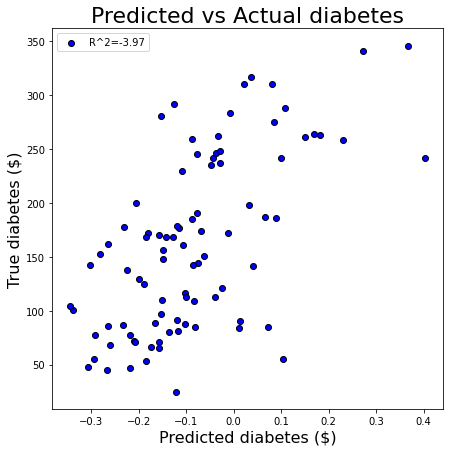

In [93]:
plot_all_observations(y_test, y_pred, y_censor_label)

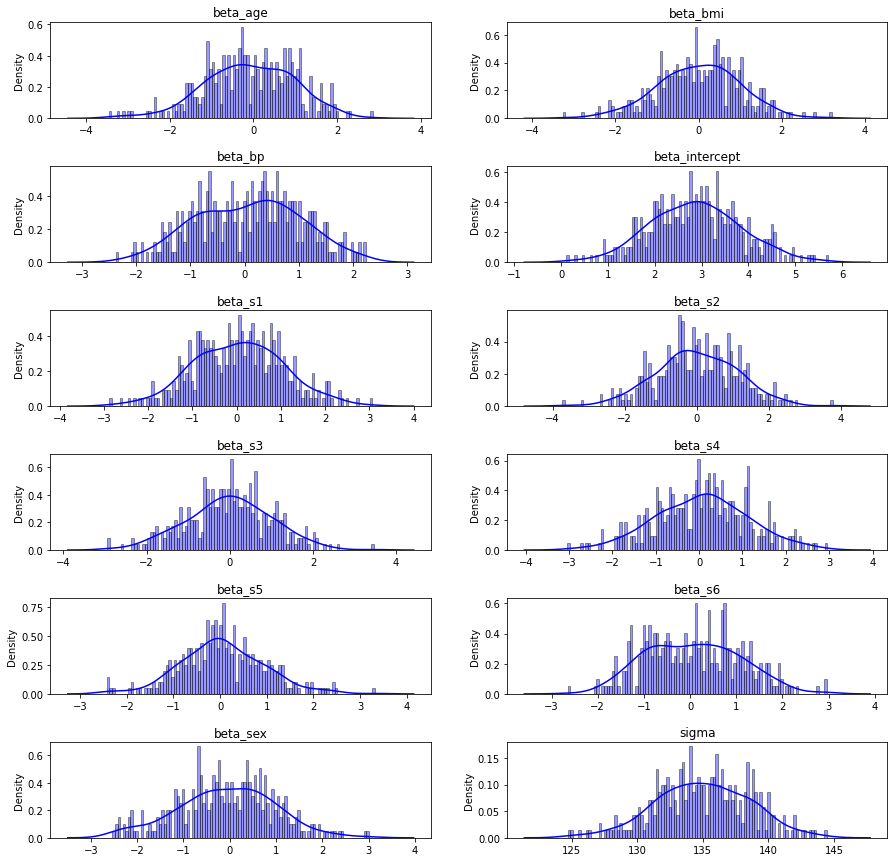

In [94]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df)

##Sample only 200 samples

In [109]:
SAMPLE_NUMBER = 200


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 200 samples. 
# Then discard the first 50
my_mcmc2 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=50)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc2.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 250/250 [01:05,  3.83it/s, step size=1.31e-01, acc. prob=0.910]



Inference ran for 1.09 minutes


In [110]:
my_mcmc2.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age      0.06      1.00      0.04     -1.52      1.57    236.38      1.00
        beta_bmi      0.16      0.98      0.13     -1.26      1.83    114.78      1.00
         beta_bp     -0.00      0.87      0.06     -1.13      1.65    133.78      1.01
  beta_intercept      2.90      0.94      2.91      1.59      4.67    441.75      1.00
         beta_s1      0.03      0.93     -0.04     -1.27      1.82    214.14      1.01
         beta_s2      0.13      1.09      0.25     -1.65      1.67    173.30      1.00
         beta_s3     -0.05      1.07     -0.06     -1.86      1.40    579.08      1.00
         beta_s4      0.08      1.07      0.09     -1.73      1.56    119.13      1.00
         beta_s5      0.03      1.06      0.06     -1.71      1.64    327.31      1.00
         beta_s6      0.04      1.04      0.00     -1.47      1.95    296.44      1.00
        beta_sex      0.01      1.15     -

In [111]:
beta_df_2 = pd.DataFrame(my_mcmc2.get_samples())
beta_df_2.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,-0.251436,1.360036,0.879921,2.194290,0.623155,2.068660,1.216960,1.333718,-0.149860,1.847303,0.249470,142.367859
1,0.401728,0.261869,-1.398803,3.648771,-1.191799,0.212448,-1.539101,-0.926438,-0.060171,-1.473743,-0.454416,129.544938
2,0.172129,0.528790,-0.330774,2.957653,-0.810480,0.262526,-1.073777,-0.281058,-0.029439,-1.711865,-1.594780,140.072481
3,0.505410,0.566350,-0.115667,3.110240,-0.571653,0.561397,-0.087295,-0.514515,-0.191528,-1.228808,-0.471411,133.463281
4,-0.244241,0.771700,-0.118299,2.621740,-0.253581,0.154173,1.402337,-0.713309,-0.999417,-0.134841,1.611928,133.740322


In [112]:
def predict_linear_combination(beta_df, X):
    
    # Don't grab the last column, that is our estimate of the error standard deviation, "sigma"
    coefficients = beta_df.iloc[:, :-1].mean()

    # Find our linear combination again
    linear_combination = X.dot(coefficients[1:]) + coefficients.iloc[0]
    
    return linear_combination

In [113]:
linear_combination_2 = predict_linear_combination(beta_df_2, X_test)
# Our predictions are the linear combination
y_pred = linear_combination_2

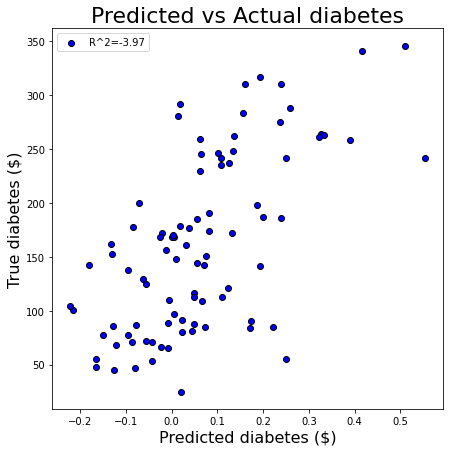

In [114]:
plot_all_observations(y_test, y_pred, y_censor_label)

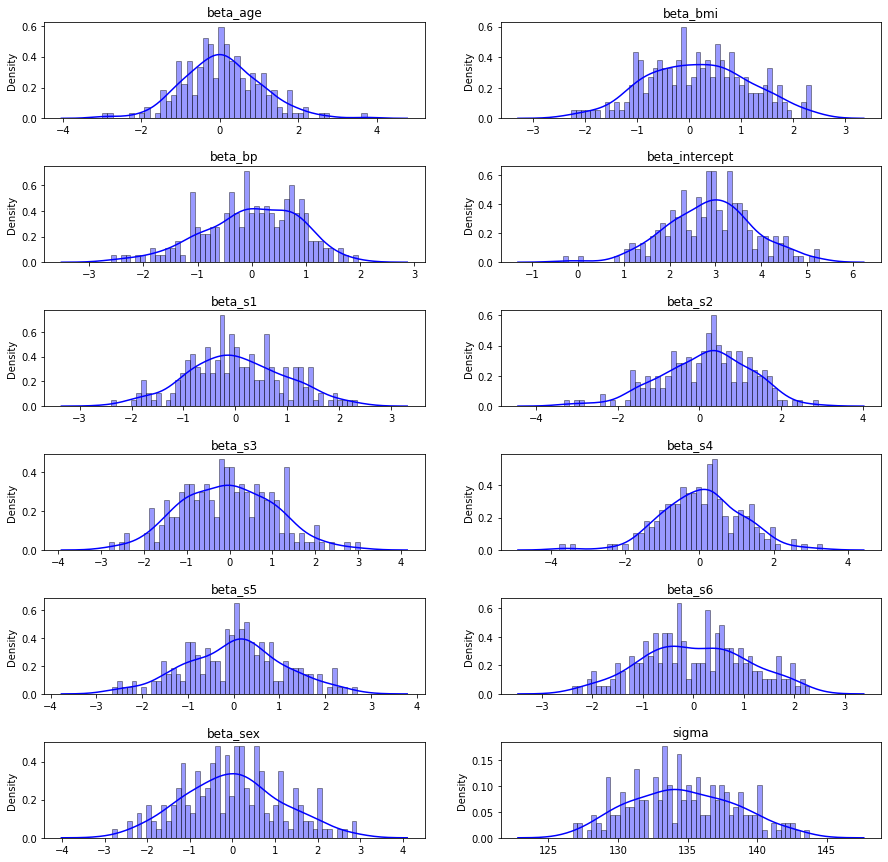

In [124]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=50, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df_2)

##Sample only 100 samples

In [116]:
SAMPLE_NUMBER = 100


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 100 samples. 
# Then discard the first 50
my_mcmc4 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=25)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc4.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 125/125 [00:11, 10.95it/s, step size=1.33e-01, acc. prob=0.040]


Inference ran for 0.19 minutes


In [117]:
my_mcmc4.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age      1.78      0.15      1.80      1.56      2.03      4.24      1.50
        beta_bmi     -0.30      0.16     -0.36     -0.57     -0.08      3.22      2.15
         beta_bp      0.48      0.16      0.47      0.25      0.77      5.18      1.46
  beta_intercept      1.53      0.12      1.54      1.32      1.67      4.59      1.01
         beta_s1      0.41      0.20      0.54      0.10      0.63      2.64      2.39
         beta_s2      0.20      0.11      0.24      0.04      0.32      3.77      1.34
         beta_s3     -0.25      0.04     -0.24     -0.31     -0.21      4.99      1.26
         beta_s4     -2.19      0.28     -2.20     -2.50     -1.80      3.99      1.19
         beta_s5      1.30      0.18      1.37      1.02      1.52      3.12      1.89
         beta_s6      1.26      0.11      1.22      1.06      1.42      5.89      1.41
        beta_sex     -1.63      0.11     -

In [118]:
beta_df_4 = pd.DataFrame(my_mcmc4.get_samples())
beta_df_4.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,2.030633,-0.097819,0.402242,1.715093,0.03227,0.022878,-0.262725,-1.809349,1.046924,1.517934,-1.433473,139.453412
1,2.030633,-0.097819,0.402242,1.715093,0.03227,0.022878,-0.262725,-1.809349,1.046924,1.517934,-1.433473,139.453412
2,2.030633,-0.097819,0.402242,1.715093,0.03227,0.022878,-0.262725,-1.809349,1.046924,1.517934,-1.433473,139.453412
3,2.030633,-0.097819,0.402242,1.715093,0.03227,0.022878,-0.262725,-1.809349,1.046924,1.517934,-1.433473,139.453412
4,2.030633,-0.097819,0.402242,1.715093,0.03227,0.022878,-0.262725,-1.809349,1.046924,1.517934,-1.433473,139.453412


In [119]:
linear_combination_4 = predict_linear_combination(beta_df_4, X_test)
# Our predictions are the linear combination
y_pred = linear_combination_4

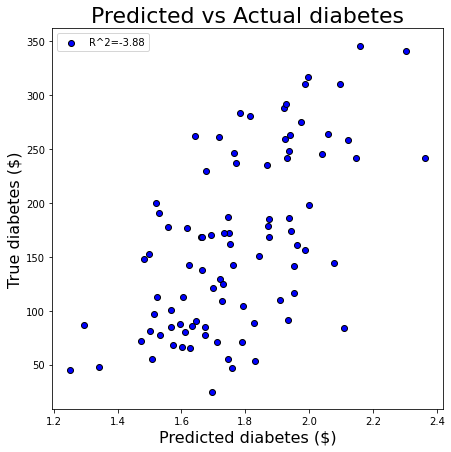

In [120]:
plot_all_observations(y_test, y_pred, y_censor_label)

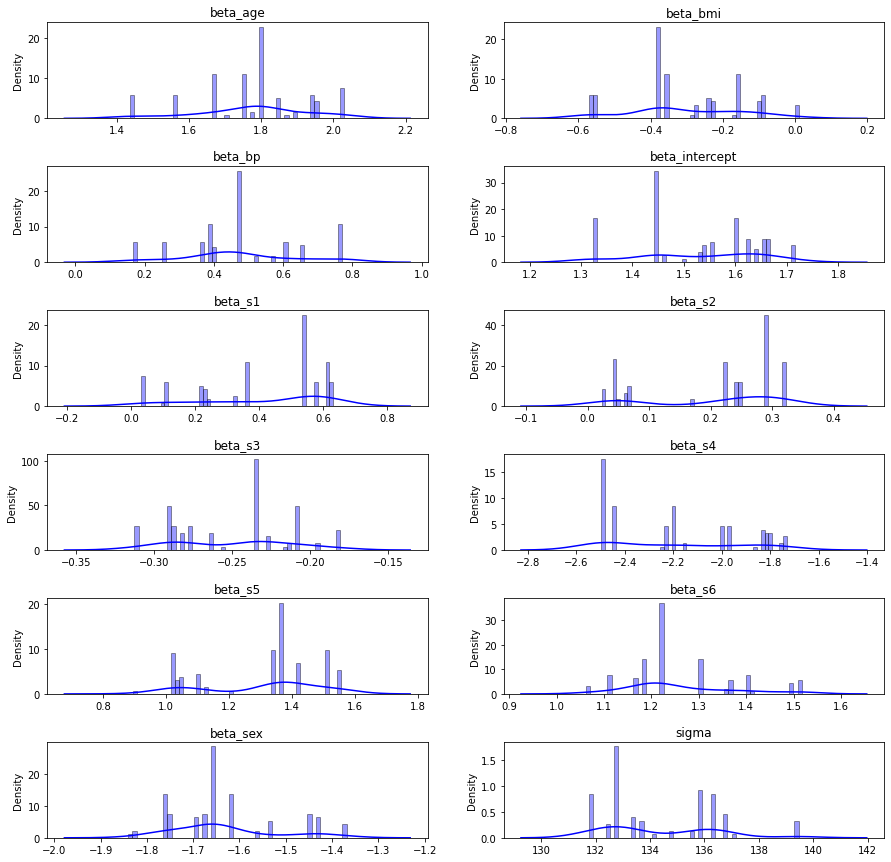

In [122]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=50, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()

draw_coefficients(beta_df_4)

##Change sigma prior distribution

In [102]:
def model_normal_2(X, y, column_names):
    
    # Define our intercept prior
    intercept_prior = dist.Normal(0.0, 1.0)
    linear_combination = pyro.sample(f"beta_intercept", intercept_prior)
    
    
    # Also define coefficient priors
    for i in range(X.shape[1]):
        coefficient_prior = dist.Normal(0.0, 1.0)
        beta_coef = pyro.sample(f"beta_{column_names[i]}", coefficient_prior)
        linear_combination = linear_combination + (X[:, i] * beta_coef)
    
    
    # Define a sigma prior for the random error
    sigma = pyro.sample("sigma", dist.HalfCauchy(10.0))
    
    # For a simple linear model, the expected mean is the linear combination of parameters
    mean = linear_combination
    
    
    with pyro.plate("data", y.shape[0]):
        
        # Assume our expected mean comes from a normal distribution with the mean which
        # depends on the linear combination, and a standard deviatin "sigma"
        outcome_dist = dist.Normal(mean, sigma)
        
        # Condition the expected mean on the observed target y
        observation = pyro.sample("obs", outcome_dist, obs=y)

In [103]:
SAMPLE_NUMBER = 353


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 353 samples. 
# Then discard the first 53
my_mcmc3 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=53)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc3.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 406/406 [02:44,  2.46it/s, step size=6.21e-02, acc. prob=0.932]


Inference ran for 2.75 minutes


In [104]:
my_mcmc3.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age      0.06      0.93      0.06     -1.37      1.58    567.15      1.00
        beta_bmi      0.10      0.98      0.06     -1.43      1.85    826.83      1.00
         beta_bp     -0.01      1.06      0.01     -1.88      1.60    756.03      1.00
  beta_intercept      2.84      1.10      2.89      1.37      4.82    471.53      1.00
         beta_s1      0.03      1.08      0.15     -1.76      1.77    507.68      1.00
         beta_s2      0.00      1.08     -0.00     -1.54      1.98    521.72      1.00
         beta_s3     -0.03      0.94     -0.04     -1.56      1.43    414.75      1.00
         beta_s4      0.07      1.01      0.01     -1.54      1.54    397.38      1.00
         beta_s5      0.06      1.05      0.09     -1.47      1.89    705.70      1.00
         beta_s6      0.04      0.94      0.02     -1.59      1.56    489.23      1.00
        beta_sex      0.04      0.99      

In [105]:
beta_df_3 = pd.DataFrame(my_mcmc3.get_samples())
beta_df_3.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,-0.114051,0.615455,-0.897287,0.924049,0.464509,-0.026947,-1.419806,1.324113,0.733190,-0.972236,-1.719529,137.353762
1,0.280739,0.406138,-0.251216,1.431103,0.297330,0.636697,-1.368722,1.064722,0.900043,0.409817,-1.479143,136.876669
2,0.401147,0.032082,0.524087,2.770444,0.726796,-1.303698,1.229052,-0.752565,-0.382796,-0.503591,1.742539,139.226310
3,0.280636,-0.471886,0.005892,2.378257,0.879140,-1.022772,0.433831,-0.059467,-0.268131,1.862112,2.442940,137.683900
4,0.461288,0.498767,0.097817,3.311376,-1.690739,0.913297,-1.217180,0.273450,0.600741,0.430267,0.951551,130.681632


In [106]:
linear_combination_3 = predict_linear_combination(beta_df_3, X_test)
# Our predictions are the linear combination
y_pred = linear_combination_3

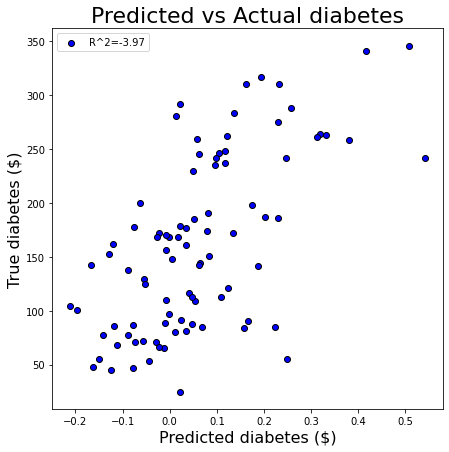

In [107]:
plot_all_observations(y_test, y_pred, y_censor_label)

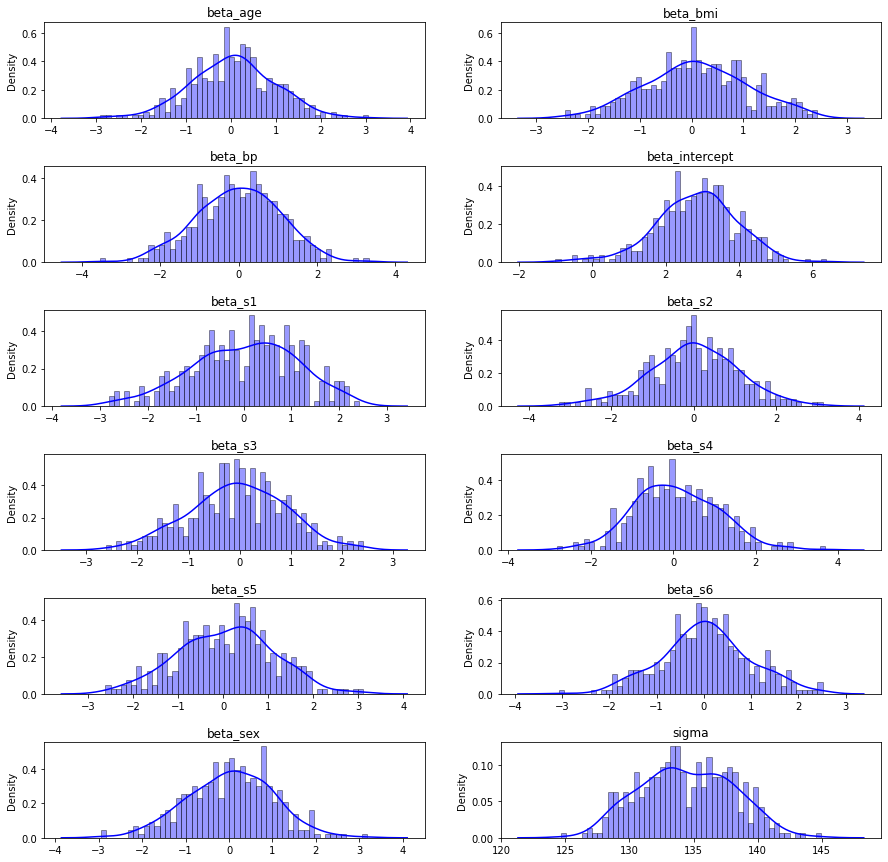

In [123]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=50, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df_3)